In [2]:
import numpy as np
import matplotlib.pyplot as plt

class StringNet:
    
    # Initialization of the StringNet Object
    def __init__(self,N):
        self.circle = [0 for i in range(N)]
        self.leg = [[]]
        self.pipe = [[] for i in range(N)]
        self.line = [[] for i in range(N)]
        self.vbegin = [i for i in range(N)]
        self.circle_number = N
        self.stack_circle = [[],N]
        self.stack_leg = [[],1]  
        self.N = N
    
    
    def fn_print(self):
        print('============================================')
        print('circle:')
        print(self.circle)
        print('leg:')
        print(self.leg)
        
        print('pipe:')
        print(self.pipe)
        print('line:')
        print(self.line)
        print('vbegin:')
        print(self.vbegin)
        print('stack_circle:')
        print(self.stack_circle)
        print('stack_leg')
        print(self.stack_leg)
        print('============================================')
    
    
    # find the circle index at position (line,y)
    def fn_find_circle(self,line,y):
        
        # if the line is empty, fetch the circle number in "vbegin"
        if not self.line[line]:
            ind_leg_up = -1
            ind_leg_down = -1
            circle_label = self.vbegin[line]
        else:
            # fetch the y coordinate in the line-th "line"
            tv = [self.line[line][i][1] for i in range(len(self.line[line]))]
            (ind_up,ind_down) = self.fn_find_nearest(y,tv)
            if ind_up!=-1:
                # fetch the index for the nearest leg 
                ind_leg_up = self.line[line][ind_up][0]
                ind_leg_down = self.line[line][ind_down][0]
                circle_label = self.leg[ind_leg_up][3]
                
            else:
                # if failuren in the call fn_find_nearest()
                ind_leg_up = -1
                ind_leg_down = -1
                circle_label = -1
        return ind_leg_up,ind_leg_down,circle_label
    
    
    # find the nearest index to the value y, in the vector vy
    def fn_find_nearest(self,y,vy):
        # In fact the input "vy" is sorted by accsend order
        # the function smod() is the same to the mod(x,1) in the matlab
        ind_large = None
        for ind_large in (x for x in range(len(vy)) if vy[x]>=y): break
        if ind_large==None:
            ind_up = len(vy) - 1
            ind_down = 0
        elif vy[ind_large]==y:
            ind_up = -1
            ind_down = -1
        elif ind_large==0:
            ind_up = len(vy) - 1
            ind_down = 0
        else:
            ind_up = ind_large - 1
            ind_down = ind_large   
        # smod = lambda x: x + 1 - int(1+x)
        # tv = [smod(vy[i] - y) for i in range(0,len(vy))]
        # the method could be improved in the furture
        # ind_up = tv.index(max(tv))
        # ind_down = tv.index(min(tv))
        # if min(tv)==0:
        #     ind_up = -1
        #     ind_down = -1
        return ind_up,ind_down   
    
    
    # The functions 
    #    fn_stack_leg_pull()
    #    fn_stack_leg_push()
    #    fn_stack_circle_pull()
    #    fn_stack_circle_push()
    # maintain the stack for generation of the index of the legs and circles
    # respectively. 
    def fn_stack_leg_pull(self):
        if not self.stack_leg[0]:
            num_leg = self.stack_leg[1]
            self.stack_leg[1] = num_leg + 1
            self.leg.append([])
        else:
            num_leg = self.stack_leg[0][-1]
            self.stack_leg[0].pop()
        return num_leg
     
        
    def fn_stack_leg_push(self,index):
        self.stack_leg[0].append(index)
    
    
    def fn_stack_circle_pull(self):
        if not self.stack_circle[0]:
            num_circle = self.stack_circle[1]
            self.stack_circle[1] = num_circle + 1
            self.circle.append([])
        else:
            num_circle = self.stack_circle[0][-1]
            self.stack_circle[0].pop()
        return num_circle
    
    
    def fn_stack_circle_push(self,index):
        self.stack_circle[0].append(index)
     
    
    def fn_update_line(self,line,num_leg,y):
        ind_large = len(self.line[line])
        for ind_large in (x for x in range(len(self.line[line])) if self.line[line][x][1]>y): break
        self.line[line][ind_large:ind_large] = [[num_leg,y]]
    
    
    def fn_update_line2(self,line,num_leg):
        self.line[line] = [x for x in self.line[line] if x[0]!=num_leg]
        
    
    def fn_update_pipe(self,pipe,num_leg,y):
        ind_large = len(self.pipe[pipe])
        for ind_large in (x for x in range(len(self.pipe[pipe])) if self.pipe[pipe][x][1]>y): break
        self.pipe[pipe][ind_large:ind_large] = [[num_leg,y]]
    
    
    def fn_update_pipe2(self,pipe,num_leg):
        self.pipe[pipe] = [x for x in self.pipe[pipe] if x[0]!=num_leg]

        
    def fn_update_leg(self,circle_number):
        if self.circle[circle_number]!=0:
            for x in range(len(self.circle[circle_number])):
                if x%2==0:
                    leg_number = self.circle[circle_number][x]
                    self.leg[leg_number][2] = circle_number
                else:
                    leg_number = -self.circle[circle_number][x]
                    self.leg[leg_number][3] = circle_number
    
    
    def fn_find_leg(self,ind_leg):
        pipe = self.leg[ind_leg][0]
        line1 = pipe
        # line2 = (pipe+1)%self.N
        n1 = len(self.line[line1])
        # n2 = len(self.line[line2])
        
        for p1 in (x for x in range(n1) if self.line[line1][x][0]==ind_leg): break
        # for p2 in (x for x in range(n2) if self.line[line2][x][0]==ind_leg): break
        left_up = self.line[line1][(p1-1)%n1][0]
        left_down = self.line[line1][(p1+1)%n1][0]
        # right_up = self.line[line2][(p2-1)%n2][0]
        # right_down = self.line[line2][(p2+1)%n2][0]
        return left_up,left_down 
           
    
    def fn_crmap2(self,dis):
        vx = [self.vbegin[k] if (not self.line[k]) \
              else self.leg[self.line[k][0][0]][2] for k in range(self.N)]
        tv = [1 if vx[k]==vx[(k+dis)%self.N] else 0 for k in range(self.N)] 
        return tv
    
    
    def fn_crmap3(self,dis):
        vx = np.array([self.vbegin[k] if (not self.line[k]) \
                       else self.leg[self.line[k][0][0]][2] for k in range(self.N)])
        vx2 = np.hstack((vx[dis:],vx[:dis]))
        
        return (vx==vx2).astype('int')
    
    
    def fn_crmap(self,dis):
        vx = np.zeros(self.N)
        for k in range(self.N):
            if not self.line[k]:
                vx[k] = self.vbegin[k]
            else:
                vx[k] = self.leg[self.line[k][0][0]][2]
            
            vx2 = np.append(vx[dis:],vx[:dis])
            
        return (vx==vx2).astype('int')
    
    def fn_which_circle(self):
        vx = np.zeros(self.N)
        for k in range(self.N):
            if not self.line[k]:
                vx[k] = self.vbegin[k]
            else:
                vx[k] = self.leg[self.line[k][0][0]][2]
                
        return vx
    
                            
    def fn_sort_circle_plus(self,circle,p_plus,p_minus):
        if p_plus==0 and p_minus==len(self.circle[circle])-1:
            return
        elif p_plus+1==p_minus:
            self.circle[circle] = self.circle[circle][p_minus:] + self.circle[circle][:p_minus]
            self.circle[circle].reverse()
        elif p_plus-1==p_minus:
            self.circle[circle] = self.circle[circle][p_plus:] + self.circle[circle][:p_plus]
            
        else:
            print('error')
    
                            
    def fn_sort_circle_minus(self,circle,p_plus,p_minus):
        if p_plus==0 and p_minus==len(self.circle[circle])-1:
            self.circle[circle].reverse()
        elif p_plus+1==p_minus:
            self.circle[circle] = self.circle[circle][p_minus:] + self.circle[circle][:p_minus]  
        elif p_plus-1==p_minus:
            self.circle[circle] = self.circle[circle][p_plus:] + self.circle[circle][:p_plus]
            self.circle[circle].reverse()                                                                       
        else:
            print('error')                                                                          
                                                                                    
    
    # Insert the leg
    def fn_insert_leg(self,pipe,y):
        # line1 and line2 are lines of the left-side and right-side of the pipe
        # respectively
        line1 = pipe
        line2 = (pipe+1)%self.N
        (leg_up_left,leg_down_left,circle_left) = self.fn_find_circle(line1,y)
        (leg_up_right,leg_down_right,circle_right) = self.fn_find_circle(line2,y)
        
        # res = -1 means the failure of the insertion
        if circle_left==-1 or circle_right==-1:
            res = -1
            print('return')
            return -1
        else:
            res = 1
                                                
        # pull a index "num_leg" for the new generated leg
        num_leg = self.fn_stack_leg_pull()
        if num_leg==len(self.leg):
            self.leg.append([pipe,y,-1,-1])
        else:
            self.leg[num_leg] = [pipe,y,-1,-1]
        
        # left circle and right circle are all empty circle
        if (self.circle[circle_left]==0) and (self.circle[circle_right]==0):
            num1 = min([circle_left,circle_right])
            num2 = max([circle_left,circle_right])
            self.circle[num1] = [num_leg,-num_leg]
            self.circle[num2] = []
            self.fn_stack_circle_push(num2) # the circle[num2] is deleted
            self.fn_update_leg(num1)
            self.circle_number = self.circle_number - 1
        # left empty but right not
        elif (self.circle[circle_left]==0) and (not self.circle[circle_right]==0):
            point_plus = self.circle[circle_right].index(leg_down_right)
            point_minus = self.circle[circle_right].index(-leg_up_right)
            if point_plus+1==point_minus:
                self.circle[circle_right][point_minus:point_minus] = [-num_leg,num_leg]
            elif point_plus-1==point_minus:
                self.circle[circle_right][point_plus:point_plus] = [num_leg,-num_leg]
            else:
                self.circle[circle_right][point_minus+1:point_minus+1] = [num_leg,-num_leg]
            self.circle[circle_left] = []
            self.fn_stack_circle_push(circle_left)
            self.fn_update_leg(circle_right)
            self.circle_number = self.circle_number - 1     
        # right empty but left not
        elif (not self.circle[circle_left]==0) and (self.circle[circle_right]==0):
            point_plus = self.circle[circle_left].index(leg_down_left)
            point_minus = self.circle[circle_left].index(-leg_up_left)
            if point_plus+1==point_minus:
                self.circle[circle_left][point_minus:point_minus] = [-num_leg,num_leg]
            elif point_plus-1==point_minus:
                self.circle[circle_left][point_plus:point_plus] = [num_leg,-num_leg]
            else:
                self.circle[circle_left][point_minus+1:point_minus+1] = [num_leg,-num_leg]
            self.circle[circle_right] = []
            self.fn_stack_circle_push(circle_right)
            self.fn_update_leg(circle_left)
            self.circle_number = self.circle_number - 1   
        else:  # if the left and the right circles are not empty
            
            # if the left and right circles are different
            if circle_left!=circle_right:
                
                if len(self.circle[circle_left])<len(self.circle[circle_right]):
                    num1 = circle_right
                    num2 = circle_left
                    p1_plus = self.circle[num1].index(leg_down_right)
                    p1_minus = self.circle[num1].index(-leg_up_right)
                    p2_plus = self.circle[num2].index(leg_down_left)
                    p2_minus = self.circle[num2].index(-leg_up_left)                                                                  
                else:
                    num1 = circle_left
                    num2 = circle_right
                    p1_plus = self.circle[num1].index(leg_down_left)
                    p1_minus = self.circle[num1].index(-leg_up_left)
                    p2_plus = self.circle[num2].index(leg_down_right)
                    p2_minus = self.circle[num2].index(-leg_up_right) 
                
                self.fn_sort_circle_plus(num1,p1_plus,p1_minus)
                self.fn_sort_circle_minus(num2,p2_plus,p2_minus)
                self.circle[num1] = self.circle[num1] + [num_leg] + self.circle[num2] + [-num_leg]
                self.circle[num2] = []
                self.circle_number = self.circle_number - 1
                self.fn_stack_circle_push(num2)
                self.fn_update_leg(num1)
                
            else: # if the left circle and the right circle are the same 
                
                # need to seperate one circle, so we need a new circle index
                num_circle = self.fn_stack_circle_pull()
                self.circle_number = self.circle_number + 1
                if leg_up_left==leg_up_right and leg_down_left==leg_down_right:
                    self.circle[circle_left] = [num_leg,-leg_up_left]
                    self.circle[num_circle] = [leg_down_left,-num_leg] 
                elif leg_up_left==leg_up_right and leg_down_left!=leg_down_right:
                    find_ind = self.circle[circle_left].index(-leg_up_left)
                    self.circle[circle_left][find_ind] = -num_leg
                    self.circle[num_circle] = [num_leg,-leg_up_left]
                elif leg_up_left!=leg_up_right and leg_down_left==leg_down_right:
                    find_ind = self.circle[circle_left].index(leg_down_left)
                    self.circle[circle_left][find_ind] = num_leg
                    self.circle[num_circle] = [leg_down_left,-num_leg]
                else:
                    # the big circle
                    p1_plus = self.circle[circle_left].index(leg_down_left)
                    p1_minus = self.circle[circle_left].index(-leg_up_left)
                    p2_plus = self.circle[circle_left].index(leg_down_right)
                    p2_minus = self.circle[circle_left].index(-leg_up_right)
                    if p1_plus+1==p1_minus:
                        if p1_minus<p2_minus and p2_minus<p2_plus:
                            self.circle[num_circle] = [num_leg] + self.circle[circle_left][p1_minus:p2_minus+1]
                            self.circle[circle_left] = self.circle[circle_left][p2_plus:] \
                            + self.circle[circle_left][:p1_plus+1] + [-num_leg]
                            
                        elif p1_minus>p2_minus:
                            self.circle[num_circle] = self.circle[circle_left][p2_plus:p1_plus+1] + [-num_leg]
                            self.circle[circle_left] = [num_leg] + self.circle[circle_left][p1_minus:] \
                            + self.circle[circle_left][:p2_minus+1]
                             
                        else:
                            self.circle[num_circle] = [num_leg] + self.circle[circle_left][p1_minus:p2_minus+1]
                            self.circle[circle_left] = self.circle[circle_left][p2_plus:p1_plus+1] + [-num_leg]
                            
                    elif p1_plus-1==p1_minus:
                        if p1_plus<p2_plus:
                            self.circle[num_circle] = [num_leg] + self.circle[circle_left][p2_minus:] \
                            + self.circle[circle_left][:p1_minus+1]
                            self.circle[circle_left] =self.circle[circle_left][p1_plus:p2_plus+1] + [-num_leg]
                            
                        else:
                            self.circle[num_circle] = [num_leg] + self.circle[circle_left][p2_minus:p1_minus+1]
                            self.circle[circle_left] = self.circle[circle_left][p1_plus:] \
                            + self.circle[circle_left][:p2_plus+1] + [-num_leg]
                            
                    else:
                        self.circle[num_circle] = [num_leg] + self.circle[circle_left][p2_minus:p1_minus+1]
                        self.circle[circle_left] = self.circle[circle_left][p1_plus:p2_plus+1] + [-num_leg]
                        
                    
                self.fn_update_leg(circle_left)
                self.fn_update_leg(num_circle)
                
        self.fn_update_line(line1,num_leg,y)
        self.fn_update_line(line2,num_leg,y)
        self.fn_update_pipe(pipe,num_leg,y)
        
        return num_leg
    
    
    #     
    def fn_delete_leg(self,ind_leg):
        circle_up = self.leg[ind_leg][2]
        circle_down = self.leg[ind_leg][3]
        pipe = self.leg[ind_leg][0]
        y = self.leg[ind_leg][1]
        line1 = pipe
        line2 = (pipe+1)%self.N
        
        if circle_up==circle_down:
            
            new_circle = self.fn_stack_circle_pull()
            self.circle_number = self.circle_number + 1
            tv = self.circle[circle_up]
            length_circle = len(tv)
            if length_circle==2:
                self.circle[circle_up] = 0
                self.circle[new_circle] = 0
                self.vbegin[line1] = circle_up
                self.vbegin[line2] = new_circle
            else:
                p_plus = tv.index(ind_leg)
                p_minus = tv.index(-ind_leg)
                if p_minus+1==p_plus:
                    p_add = p_plus + 1
                    leg_next = -tv[p_add]
                    line1_next = self.leg[leg_next][0]
                    self.circle[new_circle] = 0
                    self.circle[circle_up][p_minus:p_plus+1] = []
                    if (line1_next-line1)%self.N==1:
                        self.vbegin[line1] = new_circle
                    elif (line1_next-line1)%self.N==self.N-1:
                        self.vbegin[line2] = new_circle
                    else:
                        print('error')
                        return
                elif p_plus+1==p_minus:
                    p_add = (p_minus+1)%length_circle
                    leg_next = tv[p_add]
                    line1_next = self.leg[leg_next][0]
                    self.circle[new_circle] = 0
                    self.circle[circle_up][p_plus:p_minus+1] = []
                    if (line1_next-line1)%self.N==1:
                        self.vbegin[line1] = new_circle
                    elif (line1_next-line1)%self.N==self.N-1:
                        self.vbegin[line2] = new_circle
                    else:
                        print('error')
                        return
                elif p_plus==0 and p_minus==length_circle-1:
                    p_add = 1
                    leg_next = -tv[p_add]
                    line1_next = self.leg[leg_next][0]
                    self.circle[new_circle] = 0
                    self.circle[circle_up] = self.circle[circle_up][2:-1] + [self.circle[circle_up][1]]
                    if (line1_next-line1)%self.N==1:
                        self.vbegin[line1] = new_circle
                    elif (line1_next-line1)%self.N==self.N-1:
                        self.vbegin[line2] = new_circle
                    else:
                        print('error')
                        return
                else:
                    if p_minus<p_plus:
                        self.circle[new_circle] = (tv[p_plus+1:] + tv[:p_minus])
                        self.circle[new_circle].reverse()
                        self.circle[circle_up] = tv[p_minus+1:p_plus]
                    else:
                        self.circle[new_circle] = (tv[p_plus+1:p_minus])
                        self.circle[new_circle].reverse()
                        self.circle[circle_up] = tv[p_minus+1:] + tv[:p_plus]
            self.leg[ind_leg] = []
            self.fn_update_leg(circle_up)
            self.fn_update_leg(new_circle)
            
        else:
            (left_up,left_down) = self.fn_find_leg(ind_leg)
            # print([left_up,right_up,left_down,right_down])
            v_upc = self.circle[circle_up]
            v_dnc = self.circle[circle_down]
            p1_plus = v_upc.index(ind_leg)
            p1_minus = v_upc.index(-left_up)
            p2_minus = v_dnc.index(-ind_leg)
            p2_plus = v_dnc.index(left_down)
            
            # print([p1_plus,p1_minus,p2_plus,p2_minus])
            
            if p1_minus<p1_plus or (p1_minus==len(v_upc)-1 and p1_plus==0):
                order1 = True
            else:
                order1 = False
            if p2_minus<p2_plus or (p2_minus==len(v_dnc)-1 and p2_plus==0):
                order2 = False
            else:
                order2 = True
                
            # print([order1,order2])
                
            tv1 = v_upc[p1_plus+1:] + v_upc[:p1_plus]
            # tv2 = v_dnc[p2_minus+1:] + v_dnc[:p2_minus]
            
            if (order1 and (not order2)) or ((not order1) and order2):
                self.circle[circle_down][p2_minus:p2_minus+1] = tv1
            else:
                tv1.reverse()
                self.circle[circle_down][p2_minus:p2_minus+1] = tv1
                
            self.circle[circle_up] = []
            self.circle_number = self.circle_number - 1
            self.fn_stack_circle_push(circle_up)
            self.leg[ind_leg] = []
            self.fn_update_leg(circle_down)
            
        self.fn_update_line2(line1,ind_leg)
        self.fn_update_line2(line2,ind_leg)
        self.fn_update_pipe2(pipe,ind_leg)
        
        self.fn_stack_leg_push(ind_leg)
        return pipe,y
            
  # ==============================================================          

808
70
0
0.0050220489501953125
10
2.502556324005127
20
5.765815496444702
30
9.529803276062012
40
12.839491605758667
50
16.87282657623291
60
21.37168526649475
70
24.922046899795532
80
28.303633213043213
90
31.841925621032715
100
36.22121810913086
110
40.87737536430359
120
44.5363507270813
130
48.282917976379395
140
51.73279309272766
150
55.27768588066101
160
58.970611572265625
170
62.21887969970703
180
65.91837906837463
190
69.45402097702026
time_all=73.168067


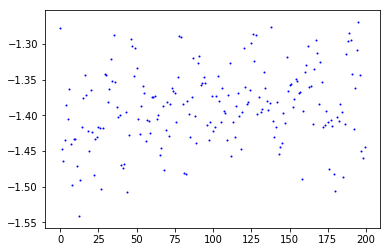

In [63]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import time

time_start = time.time()

N = 100
beta = 8
sn = StringNet(N)
num_leg = np.random.poisson(beta*N)
print(num_leg)
v_rand = [np.random.rand()*N for i in range(N)]
v_pipe = [int(v_rand[i]) for i in range(N)]
v_y = [v_rand[i]-int(v_rand[i]) for i in range(N)]
# print(v_rand)
# print(v_pipe)
# print(v_y)

for k in range(len(v_y)):
    res = sn.fn_insert_leg(v_pipe[k],v_y[k])
    if res==-1:
        print('dangerous')

print(sn.circle_number)

num_ite = 200
num_tot_step = num_ite*N
v_energy = np.zeros(num_ite)
# v_store = []

v_plot_circle = []
for i_ite in range(num_ite):
    if i_ite%10 == 0:
        print('===========================')
        print(i_ite)
        time_here = time.time()
        print(time_here-time_start)
        
    v_energy_local = np.zeros(N)
    for k in range(N):
        
        k_random = k
        
        leg_num = len(sn.pipe[k_random])
        leg_num = np.max([leg_num,2])
        
        v_energy_local_local = np.zeros(leg_num)
        for tind in range(leg_num):
            
            circle0 = sn.circle_number
            region1 = tind/leg_num
            region2 = (tind+1)/leg_num
            m_delete = sn.pipe[k_random]
            v_delete = [m_delete[i][0] for i in range(len(m_delete)) if m_delete[i][1]>region1 and m_delete[i][1]<=region2]
            v_delete_store = []
            # sn00 = copy.deepcopy(sn)
            for a in v_delete:
                # v_store.append(copy.deepcopy(sn))
                v_delete_store.append(sn.fn_delete_leg(a))
               
            num_add = np.random.poisson(beta/leg_num)
            v_add = np.random.rand(num_add)/leg_num + region1
            v_add_store = []
            for k2 in range(len(v_add)):
                y = v_add[k2]
                # v_store.append(copy.deepcopy(sn))
                while True:
                    res = sn.fn_insert_leg(k_random,y)
                    if res!=-1:
                        v_add_store.append(res)
                        break
                    else:
                        print('dangerous')
                
            circle1 = sn.circle_number
            
            if np.random.rand()<1.0/(2.0**(circle0-circle1)+1.0):
                # print('Jump')
                #print('Jump ============')
                #print(circle1)
                #print(sn.circle_number)
                res_crmap = sn.fn_crmap2(1) 
                v_energy_local_local[tind] = -3/2*sum(res_crmap) + 1/2*N
                #v_energy_local_local[tind] = np.sum(-3/2*res_crmap+1/2)
                
                
            else:
                # print('not jump')
                
                for leg_ind in v_add_store:
                    sn.fn_delete_leg(leg_ind)

                for pipe_y in v_delete_store:
                    sn.fn_insert_leg(pipe_y[0],pipe_y[1])
                
                res_crmap = sn.fn_crmap2(1)
                v_energy_local_local[tind] = -3/2*sum(res_crmap) + 1/2*N
                #v_energy_local_local[tind] = np.sum(-3/2*res_crmap+1/2)
                
                
        v_energy_local[k] = np.mean(v_energy_local_local)          
    v_plot_circle.append(sn.circle_number)
    v_energy[i_ite] = np.mean(v_energy_local)/N-1     

time_end = time.time()           

print('time_all=%f' %(time_end - time_start))
# plt.scatter([x for x in range(len(v_plot_circle))],v_plot_circle,c='b',s=1)
plt.scatter(np.arange(len(v_energy)),v_energy,c='b',s=1)
plt.show()



In [3]:
np.mean(v_energy)

-1.3833581171195728

In [5]:
np.std(v_energy)

0.052322985156579106

In [6]:
np.std(v_energy)/np.sqrt(2000)

0.0011699775159582336

In [7]:
np.size(v_energy)

2000

In [8]:
tv = v_energy - np.mean(v_energy)

In [12]:
np.sqrt(np.sum((np.power(tv,2)))/1999)

0.05233607081019287

initialized num of legs = 20223
initialized circle number = 694
initialized energy = -1.320500
0
0.016954898834228516
2
21.63999080657959
4
59.550695180892944
6
99.88597249984741
8
140.28350520133972
10
182.31987619400024
12
224.23485565185547
14
264.3443458080292
16
307.3776042461395
18
351.0360469818115
20
394.97620820999146
22
439.74393582344055
24
483.6958258152008
26
525.5837590694427
28
570.7585415840149
30
611.6132729053497
32
653.4743144512177
34
694.2472639083862
36
735.1621201038361
38
791.0110743045807
40
841.3433926105499
42
885.6925146579742
44
933.9856593608856
46
982.8845300674438
48
1025.6070799827576
50
1069.9132833480835
52
1114.9188663959503
54
1158.8527336120605
56
1200.7975807189941
58
1242.9341945648193
60
1285.6484756469727
62
1333.092913389206
64
1381.97549533844
66
1428.014876127243
68
1471.708509683609
70
1517.2664732933044
72
1562.2834522724152
74
1605.1406471729279
76
1648.2200765609741
78
1694.2040994167328
80
1740.207262992859
82
1789.7000312805176
84
1840

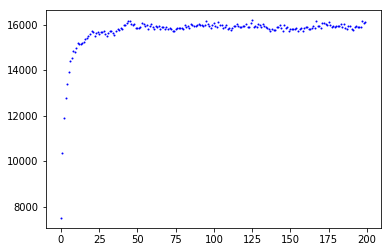

energy=-1.384585
std=0.018385


In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import time

time_start = time.time()

N = 1000
beta = 20

#=========== initialization ========================= 
sn = StringNet(N)
num_leg = np.random.poisson(beta*N)
print('initialized num of legs = %d' %(num_leg))
v_rand = [np.random.rand()*N for i in range(N)]
v_pipe = [int(v_rand[i]) for i in range(N)]
v_y = [v_rand[i]-int(v_rand[i]) for i in range(N)]

for k in range(len(v_y)):
    res = sn.fn_insert_leg(v_pipe[k],v_y[k])
    if res==-1:
        print('dangerous')

print('initialized circle number = %d' %(sn.circle_number))
res_crmap = sn.fn_crmap2(1) 
energy0 = -3/2*sum(res_crmap)/N - 1/2
print('initialized energy = %f' %(energy0))
#====================================================

num_ite = 200
update_leg_num = beta
num_tot_step = num_ite*N
# v_energy = np.zeros(num_ite)
# v_store = []

v_plot_circle = []
c_energy = np.zeros(num_ite*N*update_leg_num)
point = 0
num_jump = 0
num_no_jump = 0
for i_ite in range(num_ite):
    if i_ite%2 == 0:
        print('===========================')
        print(i_ite)
        time_here = time.time()
        print(time_here-time_start)
        
    for k in range(N):
        
        k_random = k          
        for tind in range(update_leg_num):
            
            circle0 = sn.circle_number
            
            region1 = tind/update_leg_num
            region2 = (tind+1)/update_leg_num
            m_delete = sn.pipe[k_random]
            v_delete = [m_delete[i][0] for i in range(len(m_delete)) if m_delete[i][1]>region1 and m_delete[i][1]<=region2]
            
            v_delete_store = [] # the information of deleted legs
                                # with the (pipe,y)
            for a in v_delete:
                v_delete_store.append(sn.fn_delete_leg(a))
               
            num_add = np.random.poisson(beta/update_leg_num)
            v_add = np.random.rand(num_add)/update_leg_num + region1
            v_add_store = []    # the information of the added legs
                                # with the leg index
            for k2 in range(len(v_add)):
                y = v_add[k2]
                while True:
                    res = sn.fn_insert_leg(k_random,y)
                    if res!=-1:
                        v_add_store.append(res)
                        break
                    else:
                        print('dangerous')
                 
            if (not v_add_store) and (not v_delete_store):
                num_no_jump = num_no_jump + 1
                # v_energy_local_local[tind] = energy0
                c_energy[point] = energy0
                point = point + 1
            else:
                circle1 = sn.circle_number
                if np.random.rand()<1.0/(2.0**(circle0-circle1)+1.0):       
                    # print('Jump ============')
                    num_jump = num_jump + 1
                    res_crmap = sn.fn_crmap2(1) 
                    energy0 = -3/2*sum(res_crmap)/N - 1/2
                    # v_energy_local_local[tind] = energy0
                    c_energy[point] = energy0
                    point = point + 1   
                else:
                    # print('not jump')
                    num_no_jump = num_no_jump + 1
                    for leg_ind in v_add_store:
                        sn.fn_delete_leg(leg_ind)

                    for pipe_y in v_delete_store:
                        sn.fn_insert_leg(pipe_y[0],pipe_y[1])
                
                    # v_energy_local_local[tind] = energy0
                    c_energy[point] = energy0
                    point = point + 1
                    #v_energy_local_local[tind] = np.sum(-3/2*res_crmap+1/2)        
                
        # v_energy_local[k] = np.mean(v_energy_local_local)          
    v_plot_circle.append(sn.circle_number)
    # v_energy[i_ite] = np.mean(v_energy_local)     

time_end = time.time()           

print('jump rate=%f %%' %(100*num_jump/(num_jump + num_no_jump)))
print('time_all=%f' %(time_end - time_start))

print()
plt.scatter([x for x in range(len(v_plot_circle))],v_plot_circle,c='b',s=1)
# plt.scatter(np.arange(len(c_energy)),c_energy,c='b',s=1)
plt.show()
v_e = c_energy[int(point/2):]
print('energy=%f' %(np.mean(v_e)))
print('std=%f' %(np.std(v_e)))


In [6]:
print(num_ite*N*update_leg_num)
print(point)


4000000
4000000


In [146]:
np.std(v_e)

0.06083655267976563

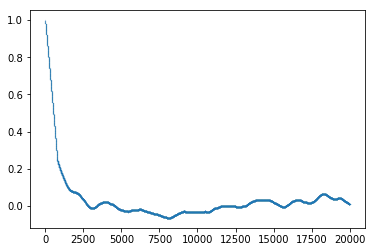

In [142]:
v = []
for k in range(2000):
    v.append((np.mean(v_e[k+1:]*v_e[:-k-1])-(np.mean(v_e[:-k-1]))*(np.mean(v_e[k+1:])))/np.var(v_e))
    
plt.scatter(np.arange(len(v)),v,s=0.01)
plt.show()

In [19]:
sum(c_energy)/len(c_energy)/100-1

-1.3859441819227252

In [72]:
ve = np.array(c_energy)

In [73]:
np.mean(ve)

-1.3550276243093926

In [74]:
len(ve)

543

In [26]:
np.std(ve)/np.sqrt(len(ve))

4.108442693890536e-05

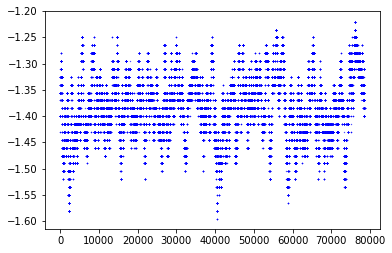

In [62]:
plt.scatter(np.arange(len(ve)),ve,c='b',s=0.1)
plt.show()

initialized num of legs = 9995
initialized circle number = 62
initialized energy = -1.310000
0
0.3273630142211914
2
8.78091835975647
4
28.09298872947693
6
52.964529514312744
8
79.94399952888489
10
105.22692060470581
12
130.12862372398376
14
154.54685187339783
16
191.04068064689636
18
224.97390484809875
20
269.6867256164551
22
328.25072145462036
24
399.5139560699463
26
446.35929560661316
28
473.60516262054443
30
499.69189405441284
32
525.5995178222656
34
551.0767750740051
36
584.669272184372
38
619.8577172756195
40
689.726854801178
42
771.0956099033356
44
817.9481945037842
46
844.2714602947235
48
866.8280611038208
50
894.1266276836395
52
918.5622057914734
54
942.9414641857147
56
972.5121078491211
58
1001.1883916854858
60
1029.510426044464
62
1064.5261940956116
64
1095.6858942508698
66
1123.0304000377655
68
1151.8819556236267
70
1180.5546629428864
72
1211.6277077198029
74
1241.913123846054
76
1276.1045315265656
78
1308.0342497825623
80
1343.3850338459015
82
1372.8554005622864
84
1411.904

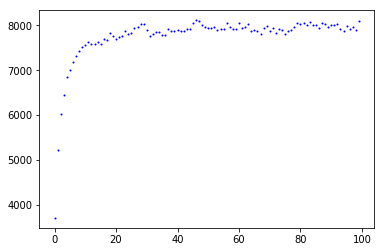

energy=-1.396267
std=0.051345


In [5]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import time

time_start = time.time()

N = 100
beta = 100

#=========== initialization ========================= 
sn = StringNet(N)
num_leg = np.random.poisson(beta*N)
print('initialized num of legs = %d' %(num_leg))
v_rand = [np.random.rand()*N for i in range(N)]
v_pipe = [int(v_rand[i]) for i in range(N)]
v_y = [v_rand[i]-int(v_rand[i]) for i in range(N)]

for k in range(len(v_y)):
    res = sn.fn_insert_leg(v_pipe[k],v_y[k])
    if res==-1:
        print('dangerous')

print('initialized circle number = %d' %(sn.circle_number))
res_crmap = sn.fn_crmap2(1) 
energy0 = -3/2*sum(res_crmap)/N - 1/2
print('initialized energy = %f' %(energy0))
#====================================================

num_ite = 100
update_leg_num = beta
num_tot_step = num_ite*N
# v_energy = np.zeros(num_ite)
# v_store = []

v_plot_circle = []
c_energy = np.zeros(num_ite*N*update_leg_num)
point = 0
num_jump = 0
num_no_jump = 0
for i_ite in range(num_ite):
    if i_ite%2 == 0:
        print('===========================')
        print(i_ite)
        time_here = time.time()
        print(time_here-time_start)
        
    for k in range(N):
        # print(k)
        k_random = k          
        for tind in range(update_leg_num):
            
            circle0 = sn.circle_number
            
            region1 = tind/update_leg_num
            region2 = (tind+1)/update_leg_num
            m_delete = sn.pipe[k_random]
            v_delete = [m_delete[i][0] for i in range(len(m_delete)) if m_delete[i][1]>region1 and m_delete[i][1]<=region2]
            
            v_delete_store = [] # the information of deleted legs
                                # with the (pipe,y)
            for a in v_delete:
                v_delete_store.append(sn.fn_delete_leg(a))
               
            num_add = np.random.poisson(beta/update_leg_num)
            v_add = np.random.rand(num_add)/update_leg_num + region1
            v_add_store = []    # the information of the added legs
                                # with the leg index
            for k2 in range(len(v_add)):
                y = v_add[k2]
                while True:
                    res = sn.fn_insert_leg(k_random,y)
                    if res!=-1:
                        v_add_store.append(res)
                        break
                    else:
                        print('dangerous')
                 
            if (not v_add_store) and (not v_delete_store):
                num_no_jump = num_no_jump + 1
                # v_energy_local_local[tind] = energy0
                c_energy[point] = energy0
                point = point + 1
            else:
                circle1 = sn.circle_number
                if np.random.rand()<1.0/(2.0**(circle0-circle1)+1.0):       
                    # print('Jump ============')
                    num_jump = num_jump + 1
                    res_crmap = sn.fn_crmap2(1) 
                    energy0 = -3/2*sum(res_crmap)/N - 1/2
                    # v_energy_local_local[tind] = energy0
                    c_energy[point] = energy0
                    point = point + 1   
                else:
                    # print('not jump')
                    num_no_jump = num_no_jump + 1
                    for leg_ind in v_add_store:
                        sn.fn_delete_leg(leg_ind)

                    for pipe_y in v_delete_store:
                        sn.fn_insert_leg(pipe_y[0],pipe_y[1])
                
                    # v_energy_local_local[tind] = energy0
                    c_energy[point] = energy0
                    point = point + 1
                    #v_energy_local_local[tind] = np.sum(-3/2*res_crmap+1/2)        
                
        # v_energy_local[k] = np.mean(v_energy_local_local)          
    v_plot_circle.append(sn.circle_number)
    # v_energy[i_ite] = np.mean(v_energy_local)     

time_end = time.time()           

print('jump rate=%f %%' %(100*num_jump/(num_jump + num_no_jump)))
print('time_all=%f' %(time_end - time_start))

print()
plt.scatter([x for x in range(len(v_plot_circle))],v_plot_circle,c='b',s=1)
# plt.scatter(np.arange(len(c_energy)),c_energy,c='b',s=1)
plt.show()
v_e = c_energy[int(point/2):]
print('energy=%f' %(np.mean(v_e)))
print('std=%f' %(np.std(v_e)))
